In [26]:
import hdf5storage
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from analysis_util import *
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.ticker import MaxNLocator


import seaborn as sns
'''this script test the hypothesis whether people respond to a fixed bound
pepole  '''
# global setting f
plt.rcParams.update({"font.size": 18})
colors = sns.color_palette("deep")
sns.set(style="whitegrid")
# top level dir 
# 




In [27]:

PROJECT_DIR = "/data/rwchain-all/round2"
BEH_DIR = os.path.join(PROJECT_DIR, "rwchain-beh/data")
EEG_DIR = os.path.join(PROJECT_DIR, "rwchain-eeg")
ALL_BEH_DIR = os.path.join(PROJECT_DIR, 'rwchain-beh', 'combined')


In [28]:
CODE_DIR = "/home/jenny/evidence-chain/"
FIG_DIR = os.path.join(CODE_DIR, "figs/rw_varying_bound_shuffle/")

In [29]:

# Check if the directory exists
if not os.path.exists(FIG_DIR):
    # Create the directory
    os.makedirs(FIG_DIR)
    print(f"Directory '{FIG_DIR}' was created.")
else:
    print(f"Directory '{FIG_DIR}' already exists.")

Directory '/home/jenny/evidence-chain/figs/rw_varying_bound_shuffle/' already exists.


In [30]:
stimdur = "100"

In [31]:

list_of_subj = os.listdir(BEH_DIR)
list_of_subj.sort()
# list_of_subj = [list_of_subj[5]]

df = pd.read_pickle(os.path.join(ALL_BEH_DIR, 'all_df_concat.pkl'))
# organize some columsn
 
df['key'][df['key'] == '[5]'] = 1
df['key'][df['key'] == '[3]'] = 1
df['key'][df['key'] == '[2]'] = 0
df['cumsum'] = df['sequence_clean'].apply(lambda x: [sum(x[:i+1]) for i in range(len(x))])

# get rid of a ;pw acc subject
df = df[df['sid']!='s108']

if stimdur == '100':
    df = df[df['stimDur'] == 0.1]
if stimdur == '250':
    df = df[df['stimDur'] == 0.25]
# df = df[df['stimDur'] != 0.5]
# df = df[df['stimDur'] != 0.05]
# df = df[df['stimDur'] == 0.1]



/tmp/ipykernel_1454299/100844696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[5]'] = 1
/tmp/ipykernel_1454299/100844696.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[3]'] = 1
/tmp/ipykernel_1454299/100844696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[2]'] = 0


In [32]:
# correct the count
df = correct_samples_by_condition(df)

cumsum = np.array(df['cumsum'].to_list())
sequence =  np.array(df['sequence_clean'].to_list())
count = df['count_corrected'].to_numpy()

In [33]:
# create a matrix of +1 and -1 with NaNs if the chain terminates

chain_matrix = get_chain_matrix(sequence, count)


In [34]:
# get the acc 


# calculate terminated chains
cumsum_stop_list = []

for c in range(cumsum.shape[0]):
    cumsum_stop = cumsum[
        c, : int(count[c]+1)
    ]  # for example, if rt adjusted i 708, for 250ms, one have seen 3 stimulus.
    cumsum_stop_list.append(cumsum_stop)
 

level_at_response = [i[-1] for i in cumsum_stop_list]
resp = df['key'].tolist()

acc = []
bound = []
for num, k in zip(level_at_response, resp):
    if (num <= 0 and k == 0) or (num >= 0 and k == 1):
        acc.append(1)
    else:
        acc.append(0)
    bound.append(np.abs(num))
print(sum(acc))
df['acc'] = acc
df['bound'] = bound



cumsum = np.array(df[df['acc']==1]['cumsum'].to_list())
sequence =  np.array(df[df['acc']==1]['sequence_clean'].to_list())
count = df[df['acc']==1]['count_corrected'].to_numpy()

chain_matrix = get_chain_matrix(sequence, count)


2939


/home/jenny/evidence-chain/analysis/analysis_util.py:213: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(
/home/jenny/evidence-chain/analysis/analysis_util.py:217: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot([i + 1 for i in position_of_samples], auc_list_test, "-o", label="Test",alpha=alpha,marker =marker, markeredgecolor=markeredgecolor)
/home/jenny/evidence-chain/analysis/analysis_util.py:213: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(
/home/jenny/evidence-chain/analysis/analysis_util.py:217: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The ke

/home/jenny/evidence-chain/analysis/analysis_util.py:213: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(
/home/jenny/evidence-chain/analysis/analysis_util.py:217: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot([i + 1 for i in position_of_samples], auc_list_test, "-o", label="Test",alpha=alpha,marker =marker, markeredgecolor=markeredgecolor)
/home/jenny/evidence-chain/analysis/analysis_util.py:213: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(
/home/jenny/evidence-chain/analysis/analysis_util.py:217: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The ke

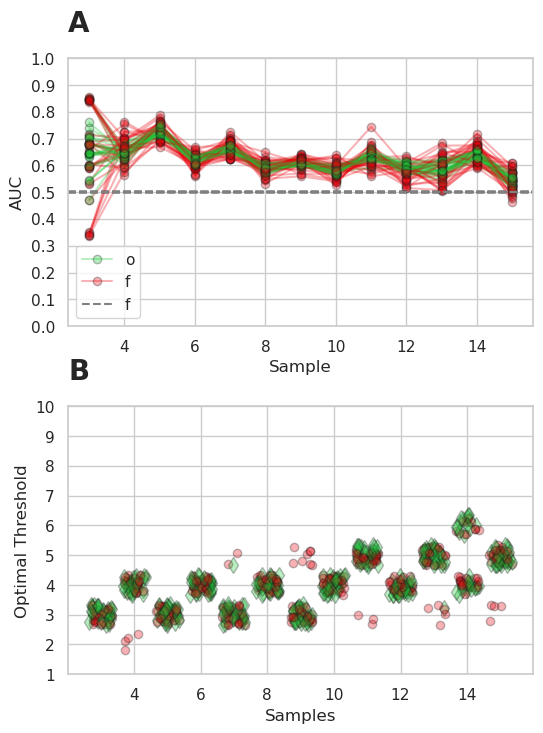

In [35]:

# set the fixed bound








# Overall plots
import string 
colors_b = sns.color_palette("bright")

color_train = colors_b[2]
color_test =  colors_b[3]
alpha = 0.3

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(6)
 

ax3 = plt.subplot2grid(shape=(2, 1), loc=(0, 0), colspan=1)
ax4 = plt.subplot2grid(shape=(2, 1), loc=(1, 0), colspan=1)


for randomseed in range(2024,2024+30):
    ###

    position_range = np.arange(2,15)

    TRUE_N = []
    TOTAL_N = []
    FPR_TRAIN =[]
    FPR_TEST =[]
    TPR_TRAIN=[]
    TPR_TEST=[]
    AUC_TRAIN =[]
    AUC_TEST =[]
    POSITION_OF_SAMPLES=[]
    N_TRAIN =[]
    N_TEST = []

    AUC_THRESH_TRAIN = []
    AUC_THRESH_TEST =[]

    for position_terminate in position_range:

        dataset, dataset_resp = make_dataset(position_terminate, count, chain_matrix)
        TRUE_N.append(dataset_resp.sum())
        TOTAL_N.append(len(dataset))
        x_train, x_test, y_train, y_test = train_test_split(
            dataset, dataset_resp, test_size=0.3, random_state=randomseed
        )
        N_TRAIN.append(len(x_train))
        N_TEST.append(len(x_test))
        # integrate evidence    
        x_train_evidence = get_abs_evidence(x_train)[:,-1]
        x_test_evidence = get_abs_evidence(x_test)[:,-1]

        # predict prob
        # predict prob
        # y_pred_prob_train = sigmoid(x_train_evidence)
        # y_pred_prob_test = sigmoid(x_test_evidence)
        y_pred_prob_train = x_train_evidence
        y_pred_prob_test = x_test_evidence

        # plot ROC
        fpr_train, tpr_train, thresh_train = metrics.roc_curve(y_train, y_pred_prob_train)
        fpr_test, tpr_test, thresh_test = metrics.roc_curve(y_test, y_pred_prob_test)
        auc_train = metrics.auc(fpr_train, tpr_train)
        auc_test = metrics.auc(fpr_test, tpr_test)
        
        
        FPR_TRAIN.append(fpr_train)
        FPR_TEST.append(fpr_test)
        TPR_TRAIN.append(tpr_train)
        TPR_TEST.append(tpr_test)
        AUC_TRAIN.append(auc_train)
        AUC_TEST.append(auc_test)
        POSITION_OF_SAMPLES.append(position_terminate)
        AUC_THRESH_TRAIN.append(thresh_train)
        AUC_THRESH_TEST.append(thresh_test)

    GMEANS_train=[]
    IDX_train=[]
    for i in range(len(TPR_TRAIN)):
        gmeans = np.sqrt(TPR_TRAIN[i] * (1-FPR_TRAIN[i]))
        ix = np.argmax(gmeans)
        GMEANS_train.append(AUC_THRESH_TRAIN[i][ix])
        IDX_train.append(ix)


    GMEANS_test=[]
    IDX_test=[]
    for i in range(len(TPR_TEST)):
        gmeans = get_gmeans(TPR_TEST[i], FPR_TEST[i])
        ix = np.argmax(gmeans)
        GMEANS_test.append(AUC_THRESH_TEST[i][ix])
        IDX_test.append(ix)


    columns = ['sample', 'bound', 'resp']
    df = pd.DataFrame({
        'sample': [],
        'bound': [],
        'resp': []
    })
    for p in position_range:
        dataset, dataset_resp = make_dataset(p, count, chain_matrix)  
        bound = get_abs_evidence(dataset)[:,-1]
        bound_stopped = bound[dataset_resp]
        bound_cont = bound[~dataset_resp]

        new_df = pd.DataFrame({
            'bound': bound,
            'resp': dataset_resp,
            'sample': p+1
        })
        df = pd.concat([df, new_df])
    ind_auc = [i for i, j in enumerate(AUC_TRAIN) if j>0.5 and (AUC_TEST[i]) >0.5]




    ###
    # ax3 
    ig_, ax3 = plot_roc_per_sample_position(POSITION_OF_SAMPLES, AUC_TRAIN, AUC_TEST,marker = 'o',ax=ax3,alpha=alpha, markeredgecolor="k")
    
    ax3.get_lines()[-2].set_color(color_train)
    ax3.get_lines()[-1].set_color(color_test)
    ax3.axhline(y=0.5, color ='grey', ls='--')
    ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax3.set_yticks(np.arange(0,1.1,0.1))

    # ax3.legend()
    np.random.seed(randomseed)
    jitter = 0.7* (np.random.rand(len(position_range),4)-0.5) 


    ax4.plot(position_range+1+jitter[:,0], np.array(GMEANS_train)+jitter[:,2], linewidth=4,linestyle='None', marker = 'd', markeredgecolor="k", alpha=alpha, color = color_train, label = 'Training',  markersize =8)
    ax4.plot(position_range+1+jitter[:,1], np.array(GMEANS_test)+jitter[:,3], marker = 'o',linestyle='None',markeredgecolor="k",  alpha=alpha, color=color_test, label = 'Test')


    # ax4.plot(position_range[ind_auc]+1, np.array(GMEANS_train)[ind_auc], linestyle='None',  marker = 'o', 
    #         alpha=0.3, color = colors_b[4],markersize=14, label="Model with AUC>0.5")





ax4.yaxis.set_major_locator(MaxNLocator(integer=True))
ax4.xaxis.set_major_locator(MaxNLocator(integer=True))
ax4.set_xlabel("Samples")
ax4.set_ylabel("Optimal Threshold")
ax4.set_ylim(1,10)
ax3.legend("off")


axs = [ax3,ax4]
for n, ax in enumerate(axs):
    ax.text(0, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.4)

# fig.tight_layout()

fig.savefig(f'{FIG_DIR}summary_subplot_{stimdur}.png', dpi=300)

In [36]:

[i for i in GMEANS_train]

[3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 5.0, 6.0, 5.0]